In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.3MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.6MB/s  eta 0:00:01
    100% |████████████████████████████████| 1.7MB 796kB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.1MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import lightgbm as lgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

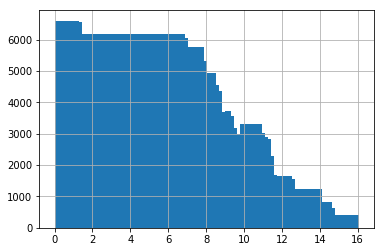

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [47]:
ydf=traintest.ydf

In [48]:
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [16]:
datadf=traintest.traindf
print datadf.shape
datadf.head()

(417740, 450)


mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [23]:
offsets_index=datadf.index.map(lambda u: u.split("_")[-1])

In [25]:
offsets=set(offsets_index)
len(offsets)

100

In [30]:
folds_index=np.array([u%5 for u in np.random.permutation(len(datadf))])
folds=set(folds_index)
folds

{0, 1, 2, 3, 4}

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
removed=[]

In [28]:
!mkdir -p input/sub/103

In [39]:
def make_sub(model, offset, fold):
    fname =os.path.join(config.INPUT_PATH, "sub", '103', "sub103_o{}_f{}.csv".format(offset, fold))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [73]:
def train_quake(traintest, offset, fold,params,n_thread):
    
    aidx= offsets_index==offset
    bidx = folds_index==fold
    validx= aidx & bidx
    trainidx= aidx & (~bidx)
    Xtr,ytr,Xte,yte=datadf.loc[trainidx], ydf.loc[trainidx], datadf.loc[validx], ydf.loc[validx]
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    if removed:
        Xtr[:,removed]=0
        Xte[:,removed]=0
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=None,
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, offset,fold)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [74]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [75]:
best_mae=1e10

In [76]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    for o in offsets:
        for fold in range(5):
            s=train_quake(traintest, o, fold,newparams,n_thread)
            print "offset", o, "fold ", fold,s
            scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "AAA, mean score", r, best_mae
    return r

In [77]:
def objective(args):
    print args
    return lgbcv(**args)



In [78]:
best={'colsample_bytree': 0.5047851370096611,
 'learning_rate': 0.001623327998143825,
 'max_depth': 3.620081401210768,
 'min_data_in_leaf': 5.006595576560673,
 'min_sum_hessian_in_leaf': 0.0007950517311813728,
 'num_leaves': 60.08234368141781,
 'reg_alpha': 2.918236416019113,
 'reg_lambda': 1.1799851577913918,
 'subsample': 0.35313520995679815}

In [79]:
b=objective(best)

{'num_leaves': 60.08234368141781, 'reg_alpha': 2.918236416019113, 'reg_lambda': 1.1799851577913918, 'colsample_bytree': 0.5047851370096611, 'min_data_in_leaf': 5.006595576560673, 'subsample': 0.35313520995679815, 'learning_rate': 0.001623327998143825, 'max_depth': 3.620081401210768, 'min_sum_hessian_in_leaf': 0.0007950517311813728}
(3367, 450) (3367,) (817, 450) (817,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3706	valid_1's l1: 2.3859
[200]	training's l1: 2.11614	valid_1's l1: 2.17377
[300]	training's l1: 1.98209	valid_1's l1: 2.08219
[400]	training's l1: 1.90544	valid_1's l1: 2.0425
[500]	training's l1: 1.85	valid_1's l1: 2.02541
[600]	training's l1: 1.80372	valid_1's l1: 2.01291
[700]	training's l1: 1.76811	valid_1's l1: 2.00838
[800]	training's l1: 1.73335	valid_1's l1: 2.00504
[900]	training's l1: 1.70168	valid_1's l1: 2.00428
[1000]	training's l1: 1.67227	valid_1's l1: 2.002
[1100]	training's l1: 1.64468	valid_1's l1: 2.00182
Early stop

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.38806	valid_1's l1: 2.31743
[200]	training's l1: 2.13601	valid_1's l1: 2.1052
[300]	training's l1: 2.00035	valid_1's l1: 2.00451
[400]	training's l1: 1.92195	valid_1's l1: 1.95961
[500]	training's l1: 1.86725	valid_1's l1: 1.93576
[600]	training's l1: 1.82232	valid_1's l1: 1.9259
[700]	training's l1: 1.78445	valid_1's l1: 1.92051
[800]	training's l1: 1.75044	valid_1's l1: 1.91544
[900]	training's l1: 1.72029	valid_1's l1: 1.91353
[1000]	training's l1: 1.69089	valid_1's l1: 1.91131
[1100]	training's l1: 1.66323	valid_1's l1: 1.91031
[1200]	training's l1: 1.63578	valid_1's l1: 1.90835
[1300]	training's l1: 1.60876	valid_1's l1: 1.90561
[1400]	training's l1: 1.58357	valid_1's l1: 1.90407
[1500]	training's l1: 1.55812	valid_1's l1: 1.90372
[1600]	training's l1: 1.5331	valid_1's l1: 1.90182
[1700]	training's l1: 1.50903	valid_1's l1: 1.90094
Early stopping, best iteration is:
[1695]	training's l1: 1.50996	

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.31812	valid_1's l1: 2.50949
[200]	training's l1: 2.07663	valid_1's l1: 2.30423
[300]	training's l1: 1.95267	valid_1's l1: 2.20006
[400]	training's l1: 1.88502	valid_1's l1: 2.15005
[500]	training's l1: 1.83595	valid_1's l1: 2.11883
[600]	training's l1: 1.79249	valid_1's l1: 2.10169
[700]	training's l1: 1.75784	valid_1's l1: 2.0881
[800]	training's l1: 1.72764	valid_1's l1: 2.07731
[900]	training's l1: 1.69769	valid_1's l1: 2.07137
[1000]	training's l1: 1.66829	valid_1's l1: 2.0648
[1100]	training's l1: 1.64027	valid_1's l1: 2.0628
[1200]	training's l1: 1.61402	valid_1's l1: 2.06035
[1300]	training's l1: 1.5881	valid_1's l1: 2.05856
[1400]	training's l1: 1.56336	valid_1's l1: 2.05601
[1500]	training's l1: 1.53897	valid_1's l1: 2.05266
[1600]	training's l1: 1.51614	valid_1's l1: 2.05024
[1700]	training's l1: 1.49287	valid_1's l1: 2.04892
[1800]	training's l1: 1.47141	valid_1's l1: 2.04838
[1900]	trainin

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35339	valid_1's l1: 2.413
[200]	training's l1: 2.10858	valid_1's l1: 2.18955
[300]	training's l1: 1.97374	valid_1's l1: 2.08798
[400]	training's l1: 1.89206	valid_1's l1: 2.04723
[500]	training's l1: 1.83521	valid_1's l1: 2.03057
[600]	training's l1: 1.78998	valid_1's l1: 2.01827
[700]	training's l1: 1.75233	valid_1's l1: 2.01255
[800]	training's l1: 1.71625	valid_1's l1: 2.00895
[900]	training's l1: 1.68553	valid_1's l1: 2.00597
[1000]	training's l1: 1.65484	valid_1's l1: 2.00534
Early stopping, best iteration is:
[977]	training's l1: 1.66143	valid_1's l1: 2.00485
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o129000_f0.csv
offset 129000 fold  0 (2.004847764640446, 977)
(3327, 450) (3327,) (843, 450) (843,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.38611	valid_1's l1: 2.27113
[200]	training's l1: 2.12744	valid_1's l1: 2.08454
[300]	training's l1: 1.

[300]	training's l1: 1.99284	valid_1's l1: 2.03756
[400]	training's l1: 1.91694	valid_1's l1: 1.98911
[500]	training's l1: 1.86407	valid_1's l1: 1.96434
[600]	training's l1: 1.8198	valid_1's l1: 1.95286
[700]	training's l1: 1.77974	valid_1's l1: 1.9438
[800]	training's l1: 1.74602	valid_1's l1: 1.93647
[900]	training's l1: 1.71234	valid_1's l1: 1.9309
[1000]	training's l1: 1.68367	valid_1's l1: 1.92655
[1100]	training's l1: 1.65521	valid_1's l1: 1.92265
[1200]	training's l1: 1.62918	valid_1's l1: 1.9206
[1300]	training's l1: 1.60365	valid_1's l1: 1.91965
[1400]	training's l1: 1.5779	valid_1's l1: 1.91745
Early stopping, best iteration is:
[1392]	training's l1: 1.58014	valid_1's l1: 1.91721
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o030000_f3.csv
offset 030000 fold  3 (1.9172097793328124, 1392)
(3327, 450) (3327,) (855, 450) (855,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.38359	valid_1's l1: 2.3647
[200]	training's l1: 2.12968	val

[800]	training's l1: 1.73316	valid_1's l1: 1.9603
[900]	training's l1: 1.70349	valid_1's l1: 1.95718
[1000]	training's l1: 1.67481	valid_1's l1: 1.9537
[1100]	training's l1: 1.64744	valid_1's l1: 1.9526
[1200]	training's l1: 1.6209	valid_1's l1: 1.94909
[1300]	training's l1: 1.59548	valid_1's l1: 1.94841
[1400]	training's l1: 1.57078	valid_1's l1: 1.94496
[1500]	training's l1: 1.54688	valid_1's l1: 1.94433
[1600]	training's l1: 1.5242	valid_1's l1: 1.94171
[1700]	training's l1: 1.50259	valid_1's l1: 1.94102
[1800]	training's l1: 1.48035	valid_1's l1: 1.93779
[1900]	training's l1: 1.46057	valid_1's l1: 1.93647
Early stopping, best iteration is:
[1891]	training's l1: 1.46252	valid_1's l1: 1.93644
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o061500_f1.csv
offset 061500 fold  1 (1.9364387377615437, 1891)
(3309, 450) (3309,) (869, 450) (869,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.33967	valid_1's l1: 2.44885
[200]	training's l1: 2.094

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o138000_f3.csv
offset 138000 fold  3 (2.0150497976896653, 1470)
(3331, 450) (3331,) (838, 450) (838,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34917	valid_1's l1: 2.44706
[200]	training's l1: 2.10776	valid_1's l1: 2.21316
[300]	training's l1: 1.97801	valid_1's l1: 2.10574
[400]	training's l1: 1.90202	valid_1's l1: 2.06487
[500]	training's l1: 1.8468	valid_1's l1: 2.04336
[600]	training's l1: 1.80195	valid_1's l1: 2.03269
[700]	training's l1: 1.76208	valid_1's l1: 2.02553
[800]	training's l1: 1.72836	valid_1's l1: 2.02041
[900]	training's l1: 1.69617	valid_1's l1: 2.01933
[1000]	training's l1: 1.66795	valid_1's l1: 2.01728
[1100]	training's l1: 1.63988	valid_1's l1: 2.01438
[1200]	training's l1: 1.61241	valid_1's l1: 2.01141
[1300]	training's l1: 1.58679	valid_1's l1: 2.01194
[1400]	training's l1: 1.5609	valid_1's l1: 2.01124
Early stopping, best iteration is:
[1386]	training's l1: 1.56446

[200]	training's l1: 2.10489	valid_1's l1: 2.17819
[300]	training's l1: 1.97163	valid_1's l1: 2.08234
[400]	training's l1: 1.89529	valid_1's l1: 2.04099
[500]	training's l1: 1.84271	valid_1's l1: 2.02022
[600]	training's l1: 1.79924	valid_1's l1: 2.00923
[700]	training's l1: 1.76169	valid_1's l1: 2.00145
[800]	training's l1: 1.72722	valid_1's l1: 1.99517
[900]	training's l1: 1.69473	valid_1's l1: 1.99299
[1000]	training's l1: 1.66436	valid_1's l1: 1.99152
[1100]	training's l1: 1.63464	valid_1's l1: 1.99133
[1200]	training's l1: 1.60593	valid_1's l1: 1.99024
Early stopping, best iteration is:
[1157]	training's l1: 1.61766	valid_1's l1: 1.9896
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o147000_f2.csv
offset 147000 fold  2 (1.9895950210153004, 1157)
(3372, 450) (3372,) (795, 450) (795,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35588	valid_1's l1: 2.37659
[200]	training's l1: 2.10346	valid_1's l1: 2.17962
[300]	training's l1: 1.97258	

[500]	training's l1: 1.84829	valid_1's l1: 2.03881
[600]	training's l1: 1.8024	valid_1's l1: 2.0286
[700]	training's l1: 1.76275	valid_1's l1: 2.02268
[800]	training's l1: 1.72797	valid_1's l1: 2.01598
[900]	training's l1: 1.6964	valid_1's l1: 2.01201
[1000]	training's l1: 1.66693	valid_1's l1: 2.00982
[1100]	training's l1: 1.63796	valid_1's l1: 2.00854
[1200]	training's l1: 1.60978	valid_1's l1: 2.00647
[1300]	training's l1: 1.58166	valid_1's l1: 2.00725
Early stopping, best iteration is:
[1219]	training's l1: 1.60446	valid_1's l1: 2.0058
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o115500_f0.csv
offset 115500 fold  0 (2.0058023133334126, 1219)
(3353, 450) (3353,) (820, 450) (820,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37875	valid_1's l1: 2.32096
[200]	training's l1: 2.12155	valid_1's l1: 2.13265
[300]	training's l1: 1.98471	valid_1's l1: 2.05284
[400]	training's l1: 1.90389	valid_1's l1: 2.01897
[500]	training's l1: 1.84616	va

[100]	training's l1: 2.37564	valid_1's l1: 2.34912
[200]	training's l1: 2.12524	valid_1's l1: 2.14359
[300]	training's l1: 1.98737	valid_1's l1: 2.04678
[400]	training's l1: 1.91166	valid_1's l1: 2.00534
[500]	training's l1: 1.85628	valid_1's l1: 1.98837
[600]	training's l1: 1.81128	valid_1's l1: 1.98005
[700]	training's l1: 1.77358	valid_1's l1: 1.97795
[800]	training's l1: 1.7417	valid_1's l1: 1.97465
[900]	training's l1: 1.7101	valid_1's l1: 1.97445
[1000]	training's l1: 1.682	valid_1's l1: 1.97419
[1100]	training's l1: 1.65388	valid_1's l1: 1.9731
Early stopping, best iteration is:
[1037]	training's l1: 1.67141	valid_1's l1: 1.97251
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o109500_f3.csv
offset 109500 fold  3 (1.972507765957456, 1037)
(3352, 450) (3352,) (823, 450) (823,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36617	valid_1's l1: 2.35183
[200]	training's l1: 2.11727	valid_1's l1: 2.14979
[300]	training's l1: 1.98832	valid_

offset 054000 fold  1 (2.0191597433095363, 465)
(3343, 450) (3343,) (836, 450) (836,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37704	valid_1's l1: 2.33812
[200]	training's l1: 2.13013	valid_1's l1: 2.10276
[300]	training's l1: 1.99782	valid_1's l1: 1.99438
[400]	training's l1: 1.92207	valid_1's l1: 1.94488
[500]	training's l1: 1.87093	valid_1's l1: 1.92153
[600]	training's l1: 1.82873	valid_1's l1: 1.91037
[700]	training's l1: 1.79177	valid_1's l1: 1.90177
[800]	training's l1: 1.75616	valid_1's l1: 1.89516
[900]	training's l1: 1.72368	valid_1's l1: 1.8892
[1000]	training's l1: 1.6919	valid_1's l1: 1.88554
[1100]	training's l1: 1.66042	valid_1's l1: 1.88376
[1200]	training's l1: 1.63219	valid_1's l1: 1.88248
[1300]	training's l1: 1.60441	valid_1's l1: 1.87959
[1400]	training's l1: 1.57744	valid_1's l1: 1.8803
Early stopping, best iteration is:
[1315]	training's l1: 1.60028	valid_1's l1: 1.87936
write to /home/hadoop/lanlep2019/input/sub/103/s

[900]	training's l1: 1.71689	valid_1's l1: 1.95941
[1000]	training's l1: 1.68696	valid_1's l1: 1.95813
[1100]	training's l1: 1.65627	valid_1's l1: 1.95636
[1200]	training's l1: 1.6291	valid_1's l1: 1.95571
[1300]	training's l1: 1.60218	valid_1's l1: 1.95655
Early stopping, best iteration is:
[1250]	training's l1: 1.61546	valid_1's l1: 1.95507
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o084000_f4.csv
offset 084000 fold  4 (1.9550699132573943, 1250)
(3323, 450) (3323,) (855, 450) (855,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35376	valid_1's l1: 2.44054
[200]	training's l1: 2.1012	valid_1's l1: 2.23375
[300]	training's l1: 1.96617	valid_1's l1: 2.13564
[400]	training's l1: 1.89154	valid_1's l1: 2.09203
[500]	training's l1: 1.83515	valid_1's l1: 2.069
[600]	training's l1: 1.79173	valid_1's l1: 2.05622
[700]	training's l1: 1.75612	valid_1's l1: 2.04777
[800]	training's l1: 1.72428	valid_1's l1: 2.04379
[900]	training's l1: 1.69545	va

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34192	valid_1's l1: 2.45095
[200]	training's l1: 2.09536	valid_1's l1: 2.23418
[300]	training's l1: 1.96535	valid_1's l1: 2.12882
[400]	training's l1: 1.88726	valid_1's l1: 2.08387
[500]	training's l1: 1.83023	valid_1's l1: 2.05748
[600]	training's l1: 1.78233	valid_1's l1: 2.04402
[700]	training's l1: 1.74323	valid_1's l1: 2.03759
[800]	training's l1: 1.71145	valid_1's l1: 2.0339
[900]	training's l1: 1.68018	valid_1's l1: 2.03251
[1000]	training's l1: 1.65089	valid_1's l1: 2.03135
[1100]	training's l1: 1.62126	valid_1's l1: 2.03119
Early stopping, best iteration is:
[1034]	training's l1: 1.64042	valid_1's l1: 2.03033
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o121500_f3.csv
offset 121500 fold  3 (2.0303265281588354, 1034)
(3292, 450) (3292,) (879, 450) (879,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3661	valid_1's l1: 2.37641
[200]	training's l1

[600]	training's l1: 1.82494	valid_1's l1: 1.95493
[700]	training's l1: 1.78669	valid_1's l1: 1.9474
[800]	training's l1: 1.75293	valid_1's l1: 1.9406
[900]	training's l1: 1.72145	valid_1's l1: 1.93665
[1000]	training's l1: 1.69026	valid_1's l1: 1.93405
[1100]	training's l1: 1.66154	valid_1's l1: 1.93254
Early stopping, best iteration is:
[1068]	training's l1: 1.67026	valid_1's l1: 1.93174
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o004500_f1.csv
offset 004500 fold  1 (1.9317351599164396, 1068)
(3267, 450) (3267,) (917, 450) (917,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35192	valid_1's l1: 2.44124
[200]	training's l1: 2.1053	valid_1's l1: 2.22566
[300]	training's l1: 1.97295	valid_1's l1: 2.11966
[400]	training's l1: 1.89604	valid_1's l1: 2.06935
[500]	training's l1: 1.83829	valid_1's l1: 2.04689
[600]	training's l1: 1.78889	valid_1's l1: 2.03472
[700]	training's l1: 1.74774	valid_1's l1: 2.02892
[800]	training's l1: 1.71222	val

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o066000_f4.csv
offset 066000 fold  4 (1.9421185497217226, 1601)
(3362, 450) (3362,) (822, 450) (822,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3441	valid_1's l1: 2.49711
[200]	training's l1: 2.10385	valid_1's l1: 2.26009
[300]	training's l1: 1.97465	valid_1's l1: 2.14228
[400]	training's l1: 1.90038	valid_1's l1: 2.08548
[500]	training's l1: 1.84711	valid_1's l1: 2.05608
[600]	training's l1: 1.80377	valid_1's l1: 2.03818
[700]	training's l1: 1.76616	valid_1's l1: 2.02798
[800]	training's l1: 1.73409	valid_1's l1: 2.02232
[900]	training's l1: 1.70311	valid_1's l1: 2.01856
[1000]	training's l1: 1.67511	valid_1's l1: 2.01587
[1100]	training's l1: 1.6479	valid_1's l1: 2.01282
[1200]	training's l1: 1.61983	valid_1's l1: 2.00985
[1300]	training's l1: 1.59418	valid_1's l1: 2.00927
Early stopping, best iteration is:
[1286]	training's l1: 1.59788	valid_1's l1: 2.00847
write to /home/hadoop/lanlep2

[700]	training's l1: 1.77448	valid_1's l1: 2.02521
[800]	training's l1: 1.7437	valid_1's l1: 2.01854
[900]	training's l1: 1.71353	valid_1's l1: 2.01288
[1000]	training's l1: 1.68355	valid_1's l1: 2.01083
[1100]	training's l1: 1.65538	valid_1's l1: 2.00991
[1200]	training's l1: 1.62888	valid_1's l1: 2.00874
[1300]	training's l1: 1.60161	valid_1's l1: 2.00841
Early stopping, best iteration is:
[1228]	training's l1: 1.62139	valid_1's l1: 2.00775
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o090000_f3.csv
offset 090000 fold  3 (2.0077495629830047, 1228)
(3332, 450) (3332,) (845, 450) (845,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35018	valid_1's l1: 2.40757
[200]	training's l1: 2.10835	valid_1's l1: 2.19312
[300]	training's l1: 1.98068	valid_1's l1: 2.09893
[400]	training's l1: 1.90793	valid_1's l1: 2.05893
[500]	training's l1: 1.85522	valid_1's l1: 2.03788
[600]	training's l1: 1.81179	valid_1's l1: 2.02484
[700]	training's l1: 1.77385

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37248	valid_1's l1: 2.36175
[200]	training's l1: 2.11935	valid_1's l1: 2.15402
[300]	training's l1: 1.98408	valid_1's l1: 2.06144
[400]	training's l1: 1.90429	valid_1's l1: 2.02541
[500]	training's l1: 1.84939	valid_1's l1: 2.00821
[600]	training's l1: 1.80386	valid_1's l1: 2.00061
[700]	training's l1: 1.76547	valid_1's l1: 1.99454
[800]	training's l1: 1.73184	valid_1's l1: 1.99224
[900]	training's l1: 1.69917	valid_1's l1: 1.98925
[1000]	training's l1: 1.66925	valid_1's l1: 1.98714
[1100]	training's l1: 1.64025	valid_1's l1: 1.98412
Early stopping, best iteration is:
[1088]	training's l1: 1.64348	valid_1's l1: 1.98403
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o037500_f2.csv
offset 037500 fold  2 (1.9840292220726152, 1088)
(3306, 450) (3306,) (876, 450) (876,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.38264	valid_1's l1: 2.34467
[200]	training's 

[700]	training's l1: 1.75208	valid_1's l1: 2.01085
[800]	training's l1: 1.71762	valid_1's l1: 2.00884
[900]	training's l1: 1.68613	valid_1's l1: 2.00513
[1000]	training's l1: 1.65571	valid_1's l1: 2.00235
[1100]	training's l1: 1.62633	valid_1's l1: 2.00117
[1200]	training's l1: 1.59992	valid_1's l1: 1.99737
[1300]	training's l1: 1.57211	valid_1's l1: 1.99425
[1400]	training's l1: 1.54627	valid_1's l1: 1.99064
[1500]	training's l1: 1.52167	valid_1's l1: 1.9874
[1600]	training's l1: 1.49764	valid_1's l1: 1.98713
Early stopping, best iteration is:
[1535]	training's l1: 1.51318	valid_1's l1: 1.98678
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o124500_f0.csv
offset 124500 fold  0 (1.9867791480775414, 1535)
(3299, 450) (3299,) (872, 450) (872,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3729	valid_1's l1: 2.35736
[200]	training's l1: 2.12095	valid_1's l1: 2.1502
[300]	training's l1: 1.98032	valid_1's l1: 2.05911
[400]	training's l1: 1.9024

[1500]	training's l1: 1.55314	valid_1's l1: 1.92665
[1600]	training's l1: 1.52962	valid_1's l1: 1.92457
[1700]	training's l1: 1.50778	valid_1's l1: 1.92412
Early stopping, best iteration is:
[1676]	training's l1: 1.51296	valid_1's l1: 1.92349
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o051000_f3.csv
offset 051000 fold  3 (1.9234885554810044, 1676)
(3335, 450) (3335,) (845, 450) (845,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34025	valid_1's l1: 2.5137
[200]	training's l1: 2.10173	valid_1's l1: 2.26655
[300]	training's l1: 1.96746	valid_1's l1: 2.14503
[400]	training's l1: 1.89218	valid_1's l1: 2.09037
[500]	training's l1: 1.83499	valid_1's l1: 2.06297
[600]	training's l1: 1.79051	valid_1's l1: 2.0502
[700]	training's l1: 1.75543	valid_1's l1: 2.04372
[800]	training's l1: 1.72219	valid_1's l1: 2.0403
[900]	training's l1: 1.6901	valid_1's l1: 2.03506
[1000]	training's l1: 1.66015	valid_1's l1: 2.02965
[1100]	training's l1: 1.63195	v

[200]	training's l1: 2.11652	valid_1's l1: 2.13295
[300]	training's l1: 1.98258	valid_1's l1: 2.05898
[400]	training's l1: 1.90986	valid_1's l1: 2.02847
[500]	training's l1: 1.85647	valid_1's l1: 2.01457
[600]	training's l1: 1.81459	valid_1's l1: 2.00647
[700]	training's l1: 1.77773	valid_1's l1: 2.00048
[800]	training's l1: 1.7435	valid_1's l1: 1.99572
[900]	training's l1: 1.71331	valid_1's l1: 1.99562
[1000]	training's l1: 1.68348	valid_1's l1: 1.99501
Early stopping, best iteration is:
[984]	training's l1: 1.6883	valid_1's l1: 1.99442
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o070500_f2.csv
offset 070500 fold  2 (1.9944169067012778, 984)
(3382, 450) (3382,) (796, 450) (796,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34038	valid_1's l1: 2.47619
[200]	training's l1: 2.09736	valid_1's l1: 2.26067
[300]	training's l1: 1.96817	valid_1's l1: 2.15641
[400]	training's l1: 1.89815	valid_1's l1: 2.10675
[500]	training's l1: 1.84644	valid

[200]	training's l1: 2.10048	valid_1's l1: 2.20317
[300]	training's l1: 1.96865	valid_1's l1: 2.11116
[400]	training's l1: 1.89105	valid_1's l1: 2.0754
[500]	training's l1: 1.83727	valid_1's l1: 2.05691
[600]	training's l1: 1.79352	valid_1's l1: 2.04758
[700]	training's l1: 1.75545	valid_1's l1: 2.03995
[800]	training's l1: 1.72141	valid_1's l1: 2.03648
[900]	training's l1: 1.69143	valid_1's l1: 2.03194
[1000]	training's l1: 1.66298	valid_1's l1: 2.03165
[1100]	training's l1: 1.63417	valid_1's l1: 2.02966
[1200]	training's l1: 1.60651	valid_1's l1: 2.02723
[1300]	training's l1: 1.57894	valid_1's l1: 2.02816
Early stopping, best iteration is:
[1200]	training's l1: 1.60651	valid_1's l1: 2.02723
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o112500_f0.csv
offset 112500 fold  0 (2.0272325717725885, 1200)
(3363, 450) (3363,) (810, 450) (810,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34179	valid_1's l1: 2.4815
[200]	training's l1: 2.09992	

[600]	training's l1: 1.7895	valid_1's l1: 2.05247
[700]	training's l1: 1.75175	valid_1's l1: 2.04648
[800]	training's l1: 1.71737	valid_1's l1: 2.04338
[900]	training's l1: 1.68651	valid_1's l1: 2.04112
[1000]	training's l1: 1.65663	valid_1's l1: 2.03951
[1100]	training's l1: 1.6275	valid_1's l1: 2.03911
Early stopping, best iteration is:
[1067]	training's l1: 1.63733	valid_1's l1: 2.03806
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o064500_f2.csv
offset 064500 fold  2 (2.0380631838499514, 1067)
(3335, 450) (3335,) (843, 450) (843,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36591	valid_1's l1: 2.39091
[200]	training's l1: 2.11506	valid_1's l1: 2.1721
[300]	training's l1: 1.98313	valid_1's l1: 2.06457
[400]	training's l1: 1.91125	valid_1's l1: 2.02071
[500]	training's l1: 1.85992	valid_1's l1: 1.99737
[600]	training's l1: 1.81406	valid_1's l1: 1.98635
[700]	training's l1: 1.77486	valid_1's l1: 1.97841
[800]	training's l1: 1.73993	val

[900]	training's l1: 1.6829	valid_1's l1: 2.09973
[1000]	training's l1: 1.65328	valid_1's l1: 2.09504
[1100]	training's l1: 1.62586	valid_1's l1: 2.09256
[1200]	training's l1: 1.59889	valid_1's l1: 2.08851
[1300]	training's l1: 1.57337	valid_1's l1: 2.08474
[1400]	training's l1: 1.54888	valid_1's l1: 2.08084
[1500]	training's l1: 1.52516	valid_1's l1: 2.07923
[1600]	training's l1: 1.50139	valid_1's l1: 2.07686
[1700]	training's l1: 1.47852	valid_1's l1: 2.07415
[1800]	training's l1: 1.45559	valid_1's l1: 2.07221
[1900]	training's l1: 1.43347	valid_1's l1: 2.0708
[2000]	training's l1: 1.4137	valid_1's l1: 2.07053
Early stopping, best iteration is:
[1954]	training's l1: 1.42285	valid_1's l1: 2.06973
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o097500_f0.csv
offset 097500 fold  0 (2.069726282101476, 1954)
(3344, 450) (3344,) (832, 450) (832,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37032	valid_1's l1: 2.34857
[200]	training's l1: 2.1

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o060000_f2.csv
offset 060000 fold  2 (1.9305517793959865, 1165)
(3343, 450) (3343,) (835, 450) (835,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.32161	valid_1's l1: 2.50964
[200]	training's l1: 2.07522	valid_1's l1: 2.3057
[300]	training's l1: 1.94788	valid_1's l1: 2.2038
[400]	training's l1: 1.87863	valid_1's l1: 2.15483
[500]	training's l1: 1.83025	valid_1's l1: 2.12876
[600]	training's l1: 1.78831	valid_1's l1: 2.11168
[700]	training's l1: 1.75383	valid_1's l1: 2.09889
[800]	training's l1: 1.71764	valid_1's l1: 2.08963
[900]	training's l1: 1.68468	valid_1's l1: 2.08205
[1000]	training's l1: 1.65477	valid_1's l1: 2.07594
[1100]	training's l1: 1.62569	valid_1's l1: 2.07307
[1200]	training's l1: 1.59694	valid_1's l1: 2.06959
[1300]	training's l1: 1.56812	valid_1's l1: 2.06405
[1400]	training's l1: 1.54269	valid_1's l1: 2.06241
[1500]	training's l1: 1.51788	valid_1's l1: 2.05979
[1600]	train

[200]	training's l1: 2.11071	valid_1's l1: 2.20644
[300]	training's l1: 1.97912	valid_1's l1: 2.0999
[400]	training's l1: 1.90264	valid_1's l1: 2.05443
[500]	training's l1: 1.84929	valid_1's l1: 2.03475
[600]	training's l1: 1.80596	valid_1's l1: 2.02447
[700]	training's l1: 1.76948	valid_1's l1: 2.01856
[800]	training's l1: 1.73442	valid_1's l1: 2.01424
[900]	training's l1: 1.70193	valid_1's l1: 2.00824
[1000]	training's l1: 1.67254	valid_1's l1: 2.00485
[1100]	training's l1: 1.64458	valid_1's l1: 2.00288
[1200]	training's l1: 1.61653	valid_1's l1: 2.00126
[1300]	training's l1: 1.59022	valid_1's l1: 2.00014
Early stopping, best iteration is:
[1244]	training's l1: 1.60538	valid_1's l1: 1.99972
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o001500_f1.csv
offset 001500 fold  1 (1.9997210688695768, 1244)
(3371, 450) (3371,) (813, 450) (813,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3344	valid_1's l1: 2.49248
[200]	training's l1: 2.08778	

Early stopping, best iteration is:
[1377]	training's l1: 1.55598	valid_1's l1: 2.00085
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o058500_f4.csv
offset 058500 fold  4 (2.0008482083072865, 1377)
(3379, 450) (3379,) (794, 450) (794,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35599	valid_1's l1: 2.45506
[200]	training's l1: 2.10979	valid_1's l1: 2.23359
[300]	training's l1: 1.97655	valid_1's l1: 2.12834
[400]	training's l1: 1.89834	valid_1's l1: 2.08025
[500]	training's l1: 1.84117	valid_1's l1: 2.05248
[600]	training's l1: 1.79652	valid_1's l1: 2.03775
[700]	training's l1: 1.75882	valid_1's l1: 2.03084
[800]	training's l1: 1.72517	valid_1's l1: 2.02356
[900]	training's l1: 1.69324	valid_1's l1: 2.01878
[1000]	training's l1: 1.66473	valid_1's l1: 2.01815
[1100]	training's l1: 1.63774	valid_1's l1: 2.01357
[1200]	training's l1: 1.61066	valid_1's l1: 2.01012
[1300]	training's l1: 1.58475	valid_1's l1: 2.00905
[1400]	training's l1: 1.559

[300]	training's l1: 1.97272	valid_1's l1: 2.12864
[400]	training's l1: 1.89568	valid_1's l1: 2.0737
[500]	training's l1: 1.84066	valid_1's l1: 2.04616
[600]	training's l1: 1.79213	valid_1's l1: 2.02928
[700]	training's l1: 1.75408	valid_1's l1: 2.0208
[800]	training's l1: 1.71932	valid_1's l1: 2.01511
[900]	training's l1: 1.68793	valid_1's l1: 2.0106
[1000]	training's l1: 1.65955	valid_1's l1: 2.00587
[1100]	training's l1: 1.63159	valid_1's l1: 2.00117
[1200]	training's l1: 1.60403	valid_1's l1: 1.99785
[1300]	training's l1: 1.57781	valid_1's l1: 1.99506
[1400]	training's l1: 1.55186	valid_1's l1: 1.9926
[1500]	training's l1: 1.52826	valid_1's l1: 1.98987
[1600]	training's l1: 1.50428	valid_1's l1: 1.98884
[1700]	training's l1: 1.48142	valid_1's l1: 1.98645
[1800]	training's l1: 1.46029	valid_1's l1: 1.98383
[1900]	training's l1: 1.43998	valid_1's l1: 1.98116
[2000]	training's l1: 1.419	valid_1's l1: 1.98225
Early stopping, best iteration is:
[1919]	training's l1: 1.43597	valid_1's l1

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o033000_f0.csv
offset 033000 fold  0 (1.896931661275632, 1752)
(3305, 450) (3305,) (877, 450) (877,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35714	valid_1's l1: 2.43162
[200]	training's l1: 2.11147	valid_1's l1: 2.20129
[300]	training's l1: 1.98036	valid_1's l1: 2.09171
[400]	training's l1: 1.90816	valid_1's l1: 2.04232
[500]	training's l1: 1.85704	valid_1's l1: 2.0184
[600]	training's l1: 1.81259	valid_1's l1: 2.00166
[700]	training's l1: 1.77344	valid_1's l1: 1.99193
[800]	training's l1: 1.74106	valid_1's l1: 1.98604
[900]	training's l1: 1.70929	valid_1's l1: 1.98049
[1000]	training's l1: 1.68001	valid_1's l1: 1.97968
Early stopping, best iteration is:
[918]	training's l1: 1.70451	valid_1's l1: 1.97879
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o033000_f1.csv
offset 033000 fold  1 (1.9787859741138218, 918)
(3353, 450) (3353,) (829, 450) (829,)
Training until validation score

[700]	training's l1: 1.78506	valid_1's l1: 1.94895
[800]	training's l1: 1.74942	valid_1's l1: 1.94586
[900]	training's l1: 1.71931	valid_1's l1: 1.94142
[1000]	training's l1: 1.69138	valid_1's l1: 1.93888
[1100]	training's l1: 1.66301	valid_1's l1: 1.93839
Early stopping, best iteration is:
[1040]	training's l1: 1.6807	valid_1's l1: 1.93729
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o072000_f4.csv
offset 072000 fold  4 (1.9372885923568535, 1040)
(3314, 450) (3314,) (862, 450) (862,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.39374	valid_1's l1: 2.25147
[200]	training's l1: 2.13839	valid_1's l1: 2.06521
[300]	training's l1: 2.00212	valid_1's l1: 1.98187
[400]	training's l1: 1.92136	valid_1's l1: 1.94995
[500]	training's l1: 1.86265	valid_1's l1: 1.93614
[600]	training's l1: 1.81465	valid_1's l1: 1.93177
[700]	training's l1: 1.77563	valid_1's l1: 1.92663
[800]	training's l1: 1.74072	valid_1's l1: 1.92601
Early stopping, best iteration

offset 019500 fold  2 (2.05447563599209, 934)
(3344, 450) (3344,) (840, 450) (840,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37756	valid_1's l1: 2.32739
[200]	training's l1: 2.11931	valid_1's l1: 2.13717
[300]	training's l1: 1.98565	valid_1's l1: 2.04881
[400]	training's l1: 1.90591	valid_1's l1: 2.01006
[500]	training's l1: 1.85214	valid_1's l1: 1.99136
[600]	training's l1: 1.80868	valid_1's l1: 1.98398
[700]	training's l1: 1.76751	valid_1's l1: 1.97929
[800]	training's l1: 1.73411	valid_1's l1: 1.97377
[900]	training's l1: 1.70304	valid_1's l1: 1.97302
[1000]	training's l1: 1.67243	valid_1's l1: 1.97303
Early stopping, best iteration is:
[949]	training's l1: 1.68825	valid_1's l1: 1.9713
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o019500_f3.csv
offset 019500 fold  3 (1.9713027591645236, 949)
(3389, 450) (3389,) (795, 450) (795,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35004	valid_1's 

[400]	training's l1: 1.88952	valid_1's l1: 2.11409
[500]	training's l1: 1.83733	valid_1's l1: 2.09778
[600]	training's l1: 1.79285	valid_1's l1: 2.08573
[700]	training's l1: 1.75527	valid_1's l1: 2.08194
[800]	training's l1: 1.7222	valid_1's l1: 2.08148
[900]	training's l1: 1.69196	valid_1's l1: 2.08064
[1000]	training's l1: 1.66307	valid_1's l1: 2.08012
Early stopping, best iteration is:
[954]	training's l1: 1.67594	valid_1's l1: 2.07933
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o088500_f1.csv
offset 088500 fold  1 (2.0793279934533295, 954)
(3329, 450) (3329,) (849, 450) (849,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36674	valid_1's l1: 2.38538
[200]	training's l1: 2.12143	valid_1's l1: 2.17705
[300]	training's l1: 1.99451	valid_1's l1: 2.06742
[400]	training's l1: 1.92022	valid_1's l1: 2.01634
[500]	training's l1: 1.86764	valid_1's l1: 1.98731
[600]	training's l1: 1.82473	valid_1's l1: 1.971
[700]	training's l1: 1.78505	valid_

[400]	training's l1: 1.88605	valid_1's l1: 2.11483
[500]	training's l1: 1.83287	valid_1's l1: 2.09796
[600]	training's l1: 1.78927	valid_1's l1: 2.09063
[700]	training's l1: 1.75293	valid_1's l1: 2.08302
[800]	training's l1: 1.72053	valid_1's l1: 2.07875
[900]	training's l1: 1.69022	valid_1's l1: 2.07574
[1000]	training's l1: 1.66069	valid_1's l1: 2.07156
[1100]	training's l1: 1.63347	valid_1's l1: 2.06843
[1200]	training's l1: 1.60682	valid_1's l1: 2.06645
[1300]	training's l1: 1.58031	valid_1's l1: 2.06362
[1400]	training's l1: 1.55533	valid_1's l1: 2.0642
Early stopping, best iteration is:
[1329]	training's l1: 1.57275	valid_1's l1: 2.06334
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o016500_f4.csv
offset 016500 fold  4 (2.0633374174222583, 1329)
(3317, 450) (3317,) (859, 450) (859,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35902	valid_1's l1: 2.38896
[200]	training's l1: 2.11289	valid_1's l1: 2.1799
[300]	training's l1: 1.98176

[500]	training's l1: 1.8516	valid_1's l1: 2.0339
[600]	training's l1: 1.80993	valid_1's l1: 2.0174
[700]	training's l1: 1.77422	valid_1's l1: 2.00853
[800]	training's l1: 1.74121	valid_1's l1: 2.00367
[900]	training's l1: 1.70959	valid_1's l1: 2.00102
[1000]	training's l1: 1.68115	valid_1's l1: 1.99588
[1100]	training's l1: 1.65237	valid_1's l1: 1.9936
[1200]	training's l1: 1.62528	valid_1's l1: 1.98989
[1300]	training's l1: 1.59951	valid_1's l1: 1.98856
[1400]	training's l1: 1.57364	valid_1's l1: 1.985
[1500]	training's l1: 1.54829	valid_1's l1: 1.98506
Early stopping, best iteration is:
[1436]	training's l1: 1.5646	valid_1's l1: 1.98372
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o028500_f3.csv
offset 028500 fold  3 (1.9837184289378134, 1436)
(3337, 450) (3337,) (846, 450) (846,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37204	valid_1's l1: 2.41829
[200]	training's l1: 2.11956	valid_1's l1: 2.20545
[300]	training's l1: 1.98369	val

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o043500_f0.csv
offset 043500 fold  0 (1.8898758238617783, 1854)
(3376, 450) (3376,) (805, 450) (805,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37169	valid_1's l1: 2.33704
[200]	training's l1: 2.10887	valid_1's l1: 2.16239
[300]	training's l1: 1.96829	valid_1's l1: 2.0882
[400]	training's l1: 1.88628	valid_1's l1: 2.06071
[500]	training's l1: 1.83257	valid_1's l1: 2.04519
[600]	training's l1: 1.78777	valid_1's l1: 2.04022
[700]	training's l1: 1.74968	valid_1's l1: 2.03886
[800]	training's l1: 1.71667	valid_1's l1: 2.03628
[900]	training's l1: 1.68542	valid_1's l1: 2.03455
[1000]	training's l1: 1.65512	valid_1's l1: 2.03364
[1100]	training's l1: 1.62556	valid_1's l1: 2.03431
Early stopping, best iteration is:
[1052]	training's l1: 1.63979	valid_1's l1: 2.0327
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o043500_f1.csv
offset 043500 fold  1 (2.032695639088864, 1052)
(3350, 450) (335

[200]	training's l1: 2.12846	valid_1's l1: 2.11216
[300]	training's l1: 1.99391	valid_1's l1: 2.02199
[400]	training's l1: 1.91482	valid_1's l1: 1.97659
[500]	training's l1: 1.85814	valid_1's l1: 1.95831
[600]	training's l1: 1.81033	valid_1's l1: 1.95124
[700]	training's l1: 1.77185	valid_1's l1: 1.9495
[800]	training's l1: 1.73997	valid_1's l1: 1.94681
[900]	training's l1: 1.70946	valid_1's l1: 1.94578
[1000]	training's l1: 1.68011	valid_1's l1: 1.94501
[1100]	training's l1: 1.65268	valid_1's l1: 1.94359
[1200]	training's l1: 1.62547	valid_1's l1: 1.94412
Early stopping, best iteration is:
[1103]	training's l1: 1.65183	valid_1's l1: 1.94336
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o007500_f4.csv
offset 007500 fold  4 (1.9433612625751273, 1103)
(3359, 450) (3359,) (817, 450) (817,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34097	valid_1's l1: 2.46116
[200]	training's l1: 2.09508	valid_1's l1: 2.25707
[300]	training's l1: 1.96546	

[800]	training's l1: 1.72421	valid_1's l1: 2.03995
[900]	training's l1: 1.69058	valid_1's l1: 2.0345
[1000]	training's l1: 1.66094	valid_1's l1: 2.03279
[1100]	training's l1: 1.63044	valid_1's l1: 2.03225
[1200]	training's l1: 1.60275	valid_1's l1: 2.03094
[1300]	training's l1: 1.57631	valid_1's l1: 2.02983
[1400]	training's l1: 1.55079	valid_1's l1: 2.0285
[1500]	training's l1: 1.52693	valid_1's l1: 2.02852
Early stopping, best iteration is:
[1446]	training's l1: 1.53978	valid_1's l1: 2.02745
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o045000_f2.csv
offset 045000 fold  2 (2.0274508945584704, 1446)
(3354, 450) (3354,) (827, 450) (827,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34273	valid_1's l1: 2.45637
[200]	training's l1: 2.09498	valid_1's l1: 2.24411
[300]	training's l1: 1.96414	valid_1's l1: 2.14242
[400]	training's l1: 1.88826	valid_1's l1: 2.09694
[500]	training's l1: 1.83428	valid_1's l1: 2.0765
[600]	training's l1: 1.79072

[1100]	training's l1: 1.61853	valid_1's l1: 2.09356
[1200]	training's l1: 1.59228	valid_1's l1: 2.09341
[1300]	training's l1: 1.56732	valid_1's l1: 2.09309
Early stopping, best iteration is:
[1221]	training's l1: 1.58742	valid_1's l1: 2.09236
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o139500_f0.csv
offset 139500 fold  0 (2.0923606933614103, 1221)
(3328, 450) (3328,) (841, 450) (841,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35551	valid_1's l1: 2.39934
[200]	training's l1: 2.10829	valid_1's l1: 2.1877
[300]	training's l1: 1.98393	valid_1's l1: 2.08369
[400]	training's l1: 1.91145	valid_1's l1: 2.03311
[500]	training's l1: 1.85743	valid_1's l1: 2.00469
[600]	training's l1: 1.81443	valid_1's l1: 1.98826
[700]	training's l1: 1.77541	valid_1's l1: 1.97944
[800]	training's l1: 1.74214	valid_1's l1: 1.97239
[900]	training's l1: 1.7104	valid_1's l1: 1.96915
[1000]	training's l1: 1.68084	valid_1's l1: 1.96563
[1100]	training's l1: 1.65252

[1200]	training's l1: 1.63197	valid_1's l1: 1.9248
Early stopping, best iteration is:
[1114]	training's l1: 1.65556	valid_1's l1: 1.92335
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o096000_f3.csv
offset 096000 fold  3 (1.9233496489995854, 1114)
(3330, 450) (3330,) (846, 450) (846,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37486	valid_1's l1: 2.38432
[200]	training's l1: 2.13624	valid_1's l1: 2.14464
[300]	training's l1: 2.00232	valid_1's l1: 2.03191
[400]	training's l1: 1.92605	valid_1's l1: 1.98402
[500]	training's l1: 1.87307	valid_1's l1: 1.95813
[600]	training's l1: 1.82849	valid_1's l1: 1.94529
[700]	training's l1: 1.79067	valid_1's l1: 1.93699
[800]	training's l1: 1.7566	valid_1's l1: 1.93081
[900]	training's l1: 1.72602	valid_1's l1: 1.92895
[1000]	training's l1: 1.69789	valid_1's l1: 1.92608
[1100]	training's l1: 1.66923	valid_1's l1: 1.92649
Early stopping, best iteration is:
[1021]	training's l1: 1.69222	valid_1's l1: 1.

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37376	valid_1's l1: 2.35669
[200]	training's l1: 2.12141	valid_1's l1: 2.14331
[300]	training's l1: 1.98449	valid_1's l1: 2.04936
[400]	training's l1: 1.90722	valid_1's l1: 2.00865
[500]	training's l1: 1.85467	valid_1's l1: 1.99
[600]	training's l1: 1.81181	valid_1's l1: 1.98004
[700]	training's l1: 1.77305	valid_1's l1: 1.97424
[800]	training's l1: 1.73833	valid_1's l1: 1.96993
[900]	training's l1: 1.70582	valid_1's l1: 1.96881
[1000]	training's l1: 1.67568	valid_1's l1: 1.96736
[1100]	training's l1: 1.64766	valid_1's l1: 1.96671
[1200]	training's l1: 1.61935	valid_1's l1: 1.96553
[1300]	training's l1: 1.59242	valid_1's l1: 1.96513
Early stopping, best iteration is:
[1234]	training's l1: 1.61074	valid_1's l1: 1.96463
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o034500_f2.csv
offset 034500 fold  2 (1.9646283798881714, 1234)
(3352, 450) (3352,) (830, 450) (830,)
Training until validation scor

Early stopping, best iteration is:
[861]	training's l1: 1.7121	valid_1's l1: 1.99927
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o111000_f0.csv
offset 111000 fold  0 (1.9992730824169924, 861)
(3310, 450) (3310,) (863, 450) (863,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36024	valid_1's l1: 2.39775
[200]	training's l1: 2.11213	valid_1's l1: 2.16167
[300]	training's l1: 1.98322	valid_1's l1: 2.05345
[400]	training's l1: 1.90692	valid_1's l1: 2.00329
[500]	training's l1: 1.85363	valid_1's l1: 1.97704
[600]	training's l1: 1.80905	valid_1's l1: 1.95956
[700]	training's l1: 1.77071	valid_1's l1: 1.95094
[800]	training's l1: 1.7391	valid_1's l1: 1.94676
[900]	training's l1: 1.70821	valid_1's l1: 1.94647
[1000]	training's l1: 1.67933	valid_1's l1: 1.94789
Early stopping, best iteration is:
[916]	training's l1: 1.70319	valid_1's l1: 1.94554
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o111000_f1.csv
offset 111000 fold  1 (1.9455388

[1200]	training's l1: 1.61229	valid_1's l1: 1.98402
Early stopping, best iteration is:
[1179]	training's l1: 1.61825	valid_1's l1: 1.98315
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o049500_f3.csv
offset 049500 fold  3 (1.9831495244355726, 1179)
(3334, 450) (3334,) (846, 450) (846,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3666	valid_1's l1: 2.37891
[200]	training's l1: 2.11955	valid_1's l1: 2.15708
[300]	training's l1: 1.98689	valid_1's l1: 2.04629
[400]	training's l1: 1.91232	valid_1's l1: 1.99577
[500]	training's l1: 1.85619	valid_1's l1: 1.96942
[600]	training's l1: 1.81059	valid_1's l1: 1.95463
[700]	training's l1: 1.77414	valid_1's l1: 1.94687
[800]	training's l1: 1.74126	valid_1's l1: 1.94124
[900]	training's l1: 1.71109	valid_1's l1: 1.9377
[1000]	training's l1: 1.67959	valid_1's l1: 1.93497
[1100]	training's l1: 1.65038	valid_1's l1: 1.93304
[1200]	training's l1: 1.6217	valid_1's l1: 1.92927
[1300]	training's l1: 1.59421	

[1000]	training's l1: 1.6745	valid_1's l1: 2.00074
[1100]	training's l1: 1.64644	valid_1's l1: 2.0001
Early stopping, best iteration is:
[1050]	training's l1: 1.65959	valid_1's l1: 1.99926
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o103500_f1.csv
offset 103500 fold  1 (1.9992648901269974, 1050)
(3318, 450) (3318,) (858, 450) (858,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34876	valid_1's l1: 2.40477
[200]	training's l1: 2.09412	valid_1's l1: 2.22641
[300]	training's l1: 1.95927	valid_1's l1: 2.15004
[400]	training's l1: 1.88258	valid_1's l1: 2.11427
[500]	training's l1: 1.82985	valid_1's l1: 2.09479
[600]	training's l1: 1.78729	valid_1's l1: 2.08343
[700]	training's l1: 1.75142	valid_1's l1: 2.07985
[800]	training's l1: 1.71829	valid_1's l1: 2.07431
[900]	training's l1: 1.68879	valid_1's l1: 2.07215
[1000]	training's l1: 1.66052	valid_1's l1: 2.07136
[1100]	training's l1: 1.6319	valid_1's l1: 2.0713
Early stopping, best iteration 

[1200]	training's l1: 1.60656	valid_1's l1: 2.01947
[1300]	training's l1: 1.57807	valid_1's l1: 2.01874
[1400]	training's l1: 1.55254	valid_1's l1: 2.0185
Early stopping, best iteration is:
[1319]	training's l1: 1.57297	valid_1's l1: 2.01775
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o048000_f4.csv
offset 048000 fold  4 (2.0177499372953163, 1319)
(3297, 450) (3297,) (887, 450) (887,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36941	valid_1's l1: 2.37782
[200]	training's l1: 2.11617	valid_1's l1: 2.16318
[300]	training's l1: 1.98319	valid_1's l1: 2.06333
[400]	training's l1: 1.90721	valid_1's l1: 2.02226
[500]	training's l1: 1.85425	valid_1's l1: 2.00144
[600]	training's l1: 1.80919	valid_1's l1: 1.98987
[700]	training's l1: 1.77085	valid_1's l1: 1.98126
[800]	training's l1: 1.73674	valid_1's l1: 1.97692
[900]	training's l1: 1.70544	valid_1's l1: 1.97293
[1000]	training's l1: 1.67629	valid_1's l1: 1.97014
[1100]	training's l1: 1.6487

write to /home/hadoop/lanlep2019/input/sub/103/sub103_o114000_f2.csv
offset 114000 fold  2 (2.019731373451447, 1443)
(3318, 450) (3318,) (855, 450) (855,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36592	valid_1's l1: 2.3542
[200]	training's l1: 2.11507	valid_1's l1: 2.14941
[300]	training's l1: 1.98619	valid_1's l1: 2.05849
[400]	training's l1: 1.90622	valid_1's l1: 2.01966
[500]	training's l1: 1.84824	valid_1's l1: 2.00391
[600]	training's l1: 1.7991	valid_1's l1: 1.99894
[700]	training's l1: 1.76163	valid_1's l1: 1.99485
[800]	training's l1: 1.72771	valid_1's l1: 1.99347
[900]	training's l1: 1.69671	valid_1's l1: 1.99182
[1000]	training's l1: 1.66649	valid_1's l1: 1.9917
[1100]	training's l1: 1.63803	valid_1's l1: 1.98955
[1200]	training's l1: 1.60843	valid_1's l1: 1.9897
Early stopping, best iteration is:
[1167]	training's l1: 1.61861	valid_1's l1: 1.98914
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o114000_f3.csv
offset 114000 f

[900]	training's l1: 1.68985	valid_1's l1: 2.0295
[1000]	training's l1: 1.66062	valid_1's l1: 2.02545
[1100]	training's l1: 1.63239	valid_1's l1: 2.02413
[1200]	training's l1: 1.60514	valid_1's l1: 2.02239
[1300]	training's l1: 1.5785	valid_1's l1: 2.02075
[1400]	training's l1: 1.55311	valid_1's l1: 2.01903
[1500]	training's l1: 1.52911	valid_1's l1: 2.01774
[1600]	training's l1: 1.50524	valid_1's l1: 2.01916
Early stopping, best iteration is:
[1504]	training's l1: 1.52829	valid_1's l1: 2.01759
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o123000_f1.csv
offset 123000 fold  1 (2.0175921041099265, 1504)
(3337, 450) (3337,) (834, 450) (834,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37083	valid_1's l1: 2.36721
[200]	training's l1: 2.11874	valid_1's l1: 2.16748
[300]	training's l1: 1.9761	valid_1's l1: 2.07818
[400]	training's l1: 1.89329	valid_1's l1: 2.04353
[500]	training's l1: 1.83627	valid_1's l1: 2.02508
[600]	training's l1: 1.7937

[600]	training's l1: 1.80564	valid_1's l1: 1.99277
[700]	training's l1: 1.76708	valid_1's l1: 1.99097
[800]	training's l1: 1.73181	valid_1's l1: 1.99097
[900]	training's l1: 1.70198	valid_1's l1: 1.98938
[1000]	training's l1: 1.67164	valid_1's l1: 1.99166
Early stopping, best iteration is:
[900]	training's l1: 1.70198	valid_1's l1: 1.98938
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o100500_f4.csv
offset 100500 fold  4 (1.9893821175950712, 900)
(3301, 450) (3301,) (877, 450) (877,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3584	valid_1's l1: 2.41219
[200]	training's l1: 2.11226	valid_1's l1: 2.19903
[300]	training's l1: 1.98052	valid_1's l1: 2.10578
[400]	training's l1: 1.90717	valid_1's l1: 2.06665
[500]	training's l1: 1.8555	valid_1's l1: 2.04255
[600]	training's l1: 1.81464	valid_1's l1: 2.02944
[700]	training's l1: 1.77781	valid_1's l1: 2.02228
[800]	training's l1: 1.74635	valid_1's l1: 2.0166
[900]	training's l1: 1.71437	valid_

(3315, 450) (3315,) (863, 450) (863,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34696	valid_1's l1: 2.44216
[200]	training's l1: 2.10429	valid_1's l1: 2.22034
[300]	training's l1: 1.97198	valid_1's l1: 2.11644
[400]	training's l1: 1.89741	valid_1's l1: 2.07227
[500]	training's l1: 1.84591	valid_1's l1: 2.05045
[600]	training's l1: 1.80454	valid_1's l1: 2.03821
[700]	training's l1: 1.76937	valid_1's l1: 2.02838
[800]	training's l1: 1.73836	valid_1's l1: 2.02493
[900]	training's l1: 1.70757	valid_1's l1: 2.01857
[1000]	training's l1: 1.68016	valid_1's l1: 2.01492
[1100]	training's l1: 1.653	valid_1's l1: 2.01389
[1200]	training's l1: 1.62573	valid_1's l1: 2.01279
[1300]	training's l1: 1.5978	valid_1's l1: 2.0134
Early stopping, best iteration is:
[1225]	training's l1: 1.61885	valid_1's l1: 2.01221
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o079500_f4.csv
offset 079500 fold  4 (2.0122074053666403, 1225)
(3325, 450) (3325,) (853, 450) 

[1000]	training's l1: 1.67625	valid_1's l1: 2.00283
[1100]	training's l1: 1.64624	valid_1's l1: 2.00165
[1200]	training's l1: 1.61926	valid_1's l1: 1.99875
[1300]	training's l1: 1.59215	valid_1's l1: 1.99858
Early stopping, best iteration is:
[1239]	training's l1: 1.60834	valid_1's l1: 1.99791
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o025500_f1.csv
offset 025500 fold  1 (1.9979139429112254, 1239)
(3373, 450) (3373,) (811, 450) (811,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37546	valid_1's l1: 2.37924
[200]	training's l1: 2.12805	valid_1's l1: 2.15241
[300]	training's l1: 1.99496	valid_1's l1: 2.04539
[400]	training's l1: 1.91929	valid_1's l1: 1.99302
[500]	training's l1: 1.86448	valid_1's l1: 1.96778
[600]	training's l1: 1.82082	valid_1's l1: 1.95563
[700]	training's l1: 1.78362	valid_1's l1: 1.94576
[800]	training's l1: 1.74924	valid_1's l1: 1.9396
[900]	training's l1: 1.71878	valid_1's l1: 1.93546
[1000]	training's l1: 1.6880

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3513	valid_1's l1: 2.40986
[200]	training's l1: 2.10334	valid_1's l1: 2.20563
[300]	training's l1: 1.97362	valid_1's l1: 2.11947
[400]	training's l1: 1.90036	valid_1's l1: 2.08006
[500]	training's l1: 1.84621	valid_1's l1: 2.05918
[600]	training's l1: 1.80592	valid_1's l1: 2.05282
[700]	training's l1: 1.76763	valid_1's l1: 2.04763
[800]	training's l1: 1.73323	valid_1's l1: 2.04259
[900]	training's l1: 1.70284	valid_1's l1: 2.04035
[1000]	training's l1: 1.67261	valid_1's l1: 2.03727
[1100]	training's l1: 1.64264	valid_1's l1: 2.03698
[1200]	training's l1: 1.61402	valid_1's l1: 2.03552
[1300]	training's l1: 1.58785	valid_1's l1: 2.0355
Early stopping, best iteration is:
[1268]	training's l1: 1.59602	valid_1's l1: 2.0346
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o102000_f4.csv
offset 102000 fold  4 (2.0346020823982047, 1268)
(3352, 450) (3352,) (823, 450) (823,)
Training until validation scor

[200]	training's l1: 2.11056	valid_1's l1: 2.22543
[300]	training's l1: 1.97953	valid_1's l1: 2.11503
[400]	training's l1: 1.90676	valid_1's l1: 2.06435
[500]	training's l1: 1.85675	valid_1's l1: 2.03804
[600]	training's l1: 1.81341	valid_1's l1: 2.02288
[700]	training's l1: 1.77809	valid_1's l1: 2.01558
[800]	training's l1: 1.74564	valid_1's l1: 2.00919
[900]	training's l1: 1.71425	valid_1's l1: 2.00388
[1000]	training's l1: 1.68399	valid_1's l1: 1.99978
[1100]	training's l1: 1.6549	valid_1's l1: 1.99628
[1200]	training's l1: 1.62774	valid_1's l1: 1.99273
[1300]	training's l1: 1.60089	valid_1's l1: 1.99088
[1400]	training's l1: 1.57459	valid_1's l1: 1.98842
[1500]	training's l1: 1.55029	valid_1's l1: 1.98634
[1600]	training's l1: 1.52654	valid_1's l1: 1.98479
[1700]	training's l1: 1.50302	valid_1's l1: 1.98445
[1800]	training's l1: 1.48143	valid_1's l1: 1.98468
Early stopping, best iteration is:
[1729]	training's l1: 1.497	valid_1's l1: 1.98353
write to /home/hadoop/lanlep2019/input/s

[600]	training's l1: 1.79582	valid_1's l1: 1.98563
[700]	training's l1: 1.75885	valid_1's l1: 1.97999
[800]	training's l1: 1.72409	valid_1's l1: 1.97496
[900]	training's l1: 1.69217	valid_1's l1: 1.97286
[1000]	training's l1: 1.66225	valid_1's l1: 1.97136
[1100]	training's l1: 1.63351	valid_1's l1: 1.9702
[1200]	training's l1: 1.60481	valid_1's l1: 1.96916
[1300]	training's l1: 1.57891	valid_1's l1: 1.96965
[1400]	training's l1: 1.5525	valid_1's l1: 1.96715
[1500]	training's l1: 1.52819	valid_1's l1: 1.96485
[1600]	training's l1: 1.5047	valid_1's l1: 1.96482
[1700]	training's l1: 1.48191	valid_1's l1: 1.9653
Early stopping, best iteration is:
[1668]	training's l1: 1.4889	valid_1's l1: 1.96414
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o120000_f0.csv
offset 120000 fold  0 (1.9641381489205225, 1668)
(3324, 450) (3324,) (847, 450) (847,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36694	valid_1's l1: 2.38167
[200]	training's l1: 2.11955

[300]	training's l1: 1.96689	valid_1's l1: 2.14034
[400]	training's l1: 1.89217	valid_1's l1: 2.09364
[500]	training's l1: 1.84041	valid_1's l1: 2.06944
[600]	training's l1: 1.79788	valid_1's l1: 2.05432
[700]	training's l1: 1.76211	valid_1's l1: 2.04358
[800]	training's l1: 1.72781	valid_1's l1: 2.03709
[900]	training's l1: 1.69771	valid_1's l1: 2.03223
[1000]	training's l1: 1.66806	valid_1's l1: 2.02844
[1100]	training's l1: 1.64	valid_1's l1: 2.02512
[1200]	training's l1: 1.61331	valid_1's l1: 2.02256
[1300]	training's l1: 1.58611	valid_1's l1: 2.01978
[1400]	training's l1: 1.56129	valid_1's l1: 2.01835
[1500]	training's l1: 1.53659	valid_1's l1: 2.01758
[1600]	training's l1: 1.51246	valid_1's l1: 2.01688
[1700]	training's l1: 1.4896	valid_1's l1: 2.01637
[1800]	training's l1: 1.46806	valid_1's l1: 2.01572
[1900]	training's l1: 1.44667	valid_1's l1: 2.01445
[2000]	training's l1: 1.42598	valid_1's l1: 2.01551
Early stopping, best iteration is:
[1909]	training's l1: 1.4451	valid_1's l

[1000]	training's l1: 1.65647	valid_1's l1: 2.04535
[1100]	training's l1: 1.62556	valid_1's l1: 2.04247
[1200]	training's l1: 1.59769	valid_1's l1: 2.03878
[1300]	training's l1: 1.57064	valid_1's l1: 2.0382
[1400]	training's l1: 1.54566	valid_1's l1: 2.0366
Early stopping, best iteration is:
[1391]	training's l1: 1.54784	valid_1's l1: 2.03602
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o006000_f2.csv
offset 006000 fold  2 (2.036017604980923, 1391)
(3404, 450) (3404,) (780, 450) (780,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36959	valid_1's l1: 2.35679
[200]	training's l1: 2.11904	valid_1's l1: 2.14733
[300]	training's l1: 1.98838	valid_1's l1: 2.05307
[400]	training's l1: 1.91253	valid_1's l1: 2.01024
[500]	training's l1: 1.85732	valid_1's l1: 1.99014
[600]	training's l1: 1.81206	valid_1's l1: 1.97987
[700]	training's l1: 1.77562	valid_1's l1: 1.97202
[800]	training's l1: 1.74223	valid_1's l1: 1.9675
[900]	training's l1: 1.71133	v

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37721	valid_1's l1: 2.336
[200]	training's l1: 2.12182	valid_1's l1: 2.14418
[300]	training's l1: 1.98791	valid_1's l1: 2.04677
[400]	training's l1: 1.90882	valid_1's l1: 1.99796
[500]	training's l1: 1.8529	valid_1's l1: 1.97593
[600]	training's l1: 1.81012	valid_1's l1: 1.96459
[700]	training's l1: 1.77431	valid_1's l1: 1.95563
[800]	training's l1: 1.74319	valid_1's l1: 1.95044
[900]	training's l1: 1.71247	valid_1's l1: 1.94676
[1000]	training's l1: 1.68363	valid_1's l1: 1.94544
[1100]	training's l1: 1.65447	valid_1's l1: 1.94375
[1200]	training's l1: 1.62521	valid_1's l1: 1.94275
[1300]	training's l1: 1.59705	valid_1's l1: 1.94203
[1400]	training's l1: 1.57054	valid_1's l1: 1.94106
[1500]	training's l1: 1.54554	valid_1's l1: 1.94106
Early stopping, best iteration is:
[1472]	training's l1: 1.55267	valid_1's l1: 1.93981
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o136500_f1.csv
offset 136500

[1100]	training's l1: 1.6563	valid_1's l1: 1.9001
[1200]	training's l1: 1.62884	valid_1's l1: 1.90018
Early stopping, best iteration is:
[1139]	training's l1: 1.64556	valid_1's l1: 1.89954
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o127500_f3.csv
offset 127500 fold  3 (1.8995416857526184, 1139)
(3348, 450) (3348,) (822, 450) (822,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.3538	valid_1's l1: 2.40102
[200]	training's l1: 2.10851	valid_1's l1: 2.18961
[300]	training's l1: 1.97802	valid_1's l1: 2.0969
[400]	training's l1: 1.90336	valid_1's l1: 2.05673
[500]	training's l1: 1.8504	valid_1's l1: 2.03637
[600]	training's l1: 1.80675	valid_1's l1: 2.02282
[700]	training's l1: 1.76734	valid_1's l1: 2.01454
[800]	training's l1: 1.73248	valid_1's l1: 2.00876
[900]	training's l1: 1.70206	valid_1's l1: 2.00511
[1000]	training's l1: 1.67175	valid_1's l1: 1.99985
[1100]	training's l1: 1.64369	valid_1's l1: 1.99789
[1200]	training's l1: 1.6146	val

(3352, 450) (3352,) (830, 450) (830,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36705	valid_1's l1: 2.38714
[200]	training's l1: 2.12206	valid_1's l1: 2.15217
[300]	training's l1: 1.98965	valid_1's l1: 2.05206
[400]	training's l1: 1.91496	valid_1's l1: 2.00364
[500]	training's l1: 1.86362	valid_1's l1: 1.97758
[600]	training's l1: 1.82055	valid_1's l1: 1.96597
[700]	training's l1: 1.78334	valid_1's l1: 1.95718
[800]	training's l1: 1.75089	valid_1's l1: 1.9494
[900]	training's l1: 1.72037	valid_1's l1: 1.94105
[1000]	training's l1: 1.69245	valid_1's l1: 1.93447
[1100]	training's l1: 1.66422	valid_1's l1: 1.92808
[1200]	training's l1: 1.63736	valid_1's l1: 1.92476
[1300]	training's l1: 1.60994	valid_1's l1: 1.92473
[1400]	training's l1: 1.58297	valid_1's l1: 1.92484
Early stopping, best iteration is:
[1325]	training's l1: 1.60315	valid_1's l1: 1.92343
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o040500_f2.csv
offset 040500 fold  2 (1.

offset 148500 fold  0 (2.0441355539519317, 1229)
(3394, 450) (3394,) (773, 450) (773,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.35217	valid_1's l1: 2.45512
[200]	training's l1: 2.10897	valid_1's l1: 2.22874
[300]	training's l1: 1.98086	valid_1's l1: 2.11248
[400]	training's l1: 1.90595	valid_1's l1: 2.06067
[500]	training's l1: 1.85252	valid_1's l1: 2.03635
[600]	training's l1: 1.80845	valid_1's l1: 2.02564
[700]	training's l1: 1.77231	valid_1's l1: 2.01667
[800]	training's l1: 1.73918	valid_1's l1: 2.0116
[900]	training's l1: 1.70862	valid_1's l1: 2.00823
[1000]	training's l1: 1.67923	valid_1's l1: 2.00598
[1100]	training's l1: 1.65154	valid_1's l1: 2.00635
[1200]	training's l1: 1.62366	valid_1's l1: 2.00474
[1300]	training's l1: 1.59655	valid_1's l1: 2.00244
[1400]	training's l1: 1.57116	valid_1's l1: 2.00193
Early stopping, best iteration is:
[1383]	training's l1: 1.57488	valid_1's l1: 2.0008
write to /home/hadoop/lanlep2019/input/sub/103

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36708	valid_1's l1: 2.39183
[200]	training's l1: 2.11654	valid_1's l1: 2.18406
[300]	training's l1: 1.9804	valid_1's l1: 2.08491
[400]	training's l1: 1.90461	valid_1's l1: 2.03754
[500]	training's l1: 1.84901	valid_1's l1: 2.01384
[600]	training's l1: 1.80286	valid_1's l1: 2.0004
[700]	training's l1: 1.76577	valid_1's l1: 1.99154
[800]	training's l1: 1.73154	valid_1's l1: 1.98502
[900]	training's l1: 1.6992	valid_1's l1: 1.98144
[1000]	training's l1: 1.66889	valid_1's l1: 1.97889
[1100]	training's l1: 1.64073	valid_1's l1: 1.97783
[1200]	training's l1: 1.61353	valid_1's l1: 1.97541
[1300]	training's l1: 1.58654	valid_1's l1: 1.97429
[1400]	training's l1: 1.56087	valid_1's l1: 1.97388
[1500]	training's l1: 1.53617	valid_1's l1: 1.97387
Early stopping, best iteration is:
[1460]	training's l1: 1.54591	valid_1's l1: 1.97322
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o042000_f4.csv
offset 042000

Early stopping, best iteration is:
[1236]	training's l1: 1.62267	valid_1's l1: 1.91289
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o000000_f2.csv
offset 000000 fold  2 (1.9128915444355357, 1236)
(3330, 450) (3330,) (854, 450) (854,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.37222	valid_1's l1: 2.3936
[200]	training's l1: 2.12935	valid_1's l1: 2.14758
[300]	training's l1: 1.99979	valid_1's l1: 2.02972
[400]	training's l1: 1.92607	valid_1's l1: 1.97833
[500]	training's l1: 1.87359	valid_1's l1: 1.95242
[600]	training's l1: 1.83155	valid_1's l1: 1.93758
[700]	training's l1: 1.79162	valid_1's l1: 1.92719
[800]	training's l1: 1.75682	valid_1's l1: 1.92189
[900]	training's l1: 1.72272	valid_1's l1: 1.91646
[1000]	training's l1: 1.69241	valid_1's l1: 1.9131
[1100]	training's l1: 1.66287	valid_1's l1: 1.91009
[1200]	training's l1: 1.63514	valid_1's l1: 1.90959
[1300]	training's l1: 1.60821	valid_1's l1: 1.90701
[1400]	training's l1: 1.5815	

[700]	training's l1: 1.75066	valid_1's l1: 2.06551
[800]	training's l1: 1.71954	valid_1's l1: 2.06233
[900]	training's l1: 1.68762	valid_1's l1: 2.05908
[1000]	training's l1: 1.65867	valid_1's l1: 2.05848
[1100]	training's l1: 1.62991	valid_1's l1: 2.05722
Early stopping, best iteration is:
[1085]	training's l1: 1.634	valid_1's l1: 2.05698
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o055500_f0.csv
offset 055500 fold  0 (2.056977390725292, 1085)
(3352, 450) (3352,) (827, 450) (827,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.34658	valid_1's l1: 2.42459
[200]	training's l1: 2.08748	valid_1's l1: 2.21458
[300]	training's l1: 1.95691	valid_1's l1: 2.12588
[400]	training's l1: 1.88396	valid_1's l1: 2.08346
[500]	training's l1: 1.83371	valid_1's l1: 2.06224
[600]	training's l1: 1.7889	valid_1's l1: 2.04901
[700]	training's l1: 1.74971	valid_1's l1: 2.04371
[800]	training's l1: 1.71593	valid_1's l1: 2.03986
[900]	training's l1: 1.68572	vali

[1400]	training's l1: 1.57738	valid_1's l1: 1.93318
[1500]	training's l1: 1.55281	valid_1's l1: 1.93191
[1600]	training's l1: 1.52879	valid_1's l1: 1.93073
[1700]	training's l1: 1.50712	valid_1's l1: 1.92967
[1800]	training's l1: 1.48559	valid_1's l1: 1.92834
[1900]	training's l1: 1.46438	valid_1's l1: 1.92767
Early stopping, best iteration is:
[1875]	training's l1: 1.46901	valid_1's l1: 1.9273
write to /home/hadoop/lanlep2019/input/sub/103/sub103_o022500_f3.csv
offset 022500 fold  3 (1.9272964400539496, 1875)
(3353, 450) (3353,) (831, 450) (831,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.36394	valid_1's l1: 2.41644
[200]	training's l1: 2.112	valid_1's l1: 2.19432
[300]	training's l1: 1.97867	valid_1's l1: 2.08699
[400]	training's l1: 1.90164	valid_1's l1: 2.04248
[500]	training's l1: 1.84874	valid_1's l1: 2.0184
[600]	training's l1: 1.80468	valid_1's l1: 2.00293
[700]	training's l1: 1.76682	valid_1's l1: 1.99555
[800]	training's l1: 1.73527	

In [80]:
b

1.990618258698611

In [83]:
files= !ls /mnt/lanlep2019/input/sub/103/sub103_o*_f*.csv
len(files)

500

In [84]:
files[:2]

['/mnt/lanlep2019/input/sub/103/sub103_o000000_f0.csv',
 '/mnt/lanlep2019/input/sub/103/sub103_o000000_f1.csv']

In [85]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [86]:
b.head()

sub103_o000000_f0  sub103_o000000_f1  sub103_o000000_f2  \
seg_id                                                                
seg_05a1b0           4.787495           4.946909           4.485874   
seg_f0181d           4.995353           5.222443           5.133082   
seg_5b7325           3.310197           3.377319           3.309992   
seg_c6b514           3.025042           3.022685           3.167981   
seg_52c139           9.584006           9.273484           9.931921   

            sub103_o000000_f3  sub103_o000000_f4  sub103_o001500_f0  \
seg_id                                                                
seg_05a1b0           4.835427           4.608493           4.709396   
seg_f0181d           5.267860           5.056384           5.107979   
seg_5b7325           3.234856           3.158131           3.081642   
seg_c6b514           3.648472           3.511491           3.425761   
seg_52c139           9.126138           9.201467           8.722612   

            sub103_o001500_f1  sub103_o001500_f2  sub103_o001500_f3  \
seg_id                                                                
seg_05a1b0           4.743594           4.575252           5.013403   
seg_f0181d           4.881143           5.116499           5.217767   
seg_5b7325           3.270533           3.223354           3.417134   
seg_c6b514           3.178937           3.492962           3.056460   
seg_52c139           9.110751           9.421694           8.875718   

            sub103_o001500_f4        ...          sub103_o147000_f0  \
seg_id                               ...                              
seg_05a1b0           4.771689        ...                   4.724739   
seg_f0181d           5.116410        ...                   5.346872   
seg_5b7325           3.347286        ...                   3.191808   
seg_c6b514           3.471007        ...                   3.411465   
seg_52c139           9.119059        ...                  10.290881   

            sub103_o147000_f1  sub103_o147000_f2  sub103_o147000_f3  \
seg_id                                                                
seg_05a1b0           4.708507           4.955753           4.388882   
seg_f0181d           5.187179           5.216316           5.007298   
seg_5b7325           3.395829           3.349896           3.188098   
seg_c6b514           3.850930           3.380345           3.167741   
seg_52c139           9.607417           9.595597           9.448436   

            sub103_o147000_f4  sub103_o148500_f0  sub103_o148500_f1  \
seg_id                                                                
seg_05a1b0           4.665852           4.925634           4.398866   
seg_f0181d           5.143792           5.085551           5.036852   
seg_5b7325           3.237517           3.217660           3.316401   
seg_c6b514           3.156637           3.424242           3.158492   
seg_52c139           8.989059           9.781820           9.429433   

            sub103_o148500_f2  sub103_o148500_f3  sub103_o148500_f4  
seg_id                                                               
seg_05a1b0           4.915748           4.803622           4.503165  
seg_f0181d           5.159492           5.212386           4.844418  
seg_5b7325           3.265851           3.303090           3.322323  
seg_c6b514           3.512780           3.230113           3.609159  
seg_52c139           9.730937           9.696601           9.643734  

[5 rows x 500 columns]

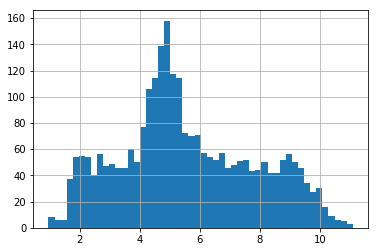

In [87]:
b.mean(1).hist(bins=50);

In [91]:
np.abs(b.median(1)-b.mean(1)).mean()

0.01026406339879982

In [92]:
b.mean(1).mean(),b.median(1).mean()

(5.572528757474482, 5.57026529912691)

In [93]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", '103', "sub103_{}.csv".format('mean'))
p.to_csv(fname,index=None)

In [94]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", '103', "sub103_{}.csv".format('median'))
p.to_csv(fname,index=None)